In [24]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .getOrCreate()


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

from pyspark.sql.functions import concat, col, lit, to_date


In [3]:
def castColumn(df, field, cast_type):
    return df \
        .withColumn(field + '_tmp', df[field].cast(cast_type)) \
        .drop(field) \
        .withColumnRenamed(field + '_tmp', field) 

def process_df(df):
    df = df \
        .filter(df.ArrDelay != "NA") \
        .filter(df.DepTime != "NA") \
        .filter(df.CRSDepTime != "NA") \
        .filter(df.CRSArrTime != "NA") \
        .withColumn('Date', to_date(concat(col("Year"), lit("-"), col("Month"), lit('-'), col('DayofMonth'))))
    df = castColumn(df, 'ArrDelay', 'int')
    df = castColumn(df, 'DepDelay', 'int')
    df = castColumn(df, 'CRSElapsedTime', 'int')
    df = castColumn(df, 'Distance', 'int')
    df = castColumn(df, 'TaxiOut', 'int')
    return df

In [4]:
df = spark.read.csv("data/2007_stripped.csv", header=True)


In [5]:
df = process_df(df)


df.createOrReplaceTempView("df")

df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Year,7275288,2007.0,8.076359110502084E-14,2007,2007
Month,7275288,6.528180052803408,3.41868149063773,1,9
DayofMonth,7275288,15.723707844967787,8.791405306738897,1,9
DayOfWeek,7275288,3.9358740162588752,1.9935256514483028,1,7
DepTime,7275288,1339.2013135425018,479.8841939735205,1,959
CRSDepTime,7275288,1329.358970531476,464.79368349510196,1,959
CRSArrTime,7275288,1494.0287036059603,481.63542781067093,1,959
UniqueCarrier,7275288,None,None,9E,YV
FlightNum,7275288,2171.9037676584076,1964.7788559481571,1,999


In [27]:
df.show()

+----+-----+----------+---------+-------+----------+----------+-------------+---------+-------+------+----+---------+----------------+----------+--------+--------+--------------+--------+-------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|Origin|Dest|Cancelled|CancellationCode|      Date|ArrDelay|DepDelay|CRSElapsedTime|Distance|TaxiOut|
+----+-----+----------+---------+-------+----------+----------+-------------+---------+-------+------+----+---------+----------------+----------+--------+--------+--------------+--------+-------+
|2007|    1|         1|        1|   1232|      1225|      1340|           WN|     2891|   N351|   SMF| ONT|        0|            null|2007-01-01|       1|       7|            75|     389|     11|
|2007|    1|         1|        1|   1918|      1905|      2035|           WN|      462|   N370|   SMF| PDX|        0|            null|2007-01-01|       8|      13|            90|     479|      6|
|2007|    1|        

In [6]:
feature_df = spark.sql('select Year, Month, DayOfMonth, Origin from df')

In [20]:
count_per_day = feature_df.groupBy("Year", "Month", "DayOfMonth", "Origin", ).count()



In [21]:
count_per_day.show()

+----+-----+----------+------+-----+
|Year|Month|DayOfMonth|Origin|count|
+----+-----+----------+------+-----+
|2007|    1|         3|   PDX|  160|
|2007|    1|         4|   MCO|  332|
|2007|    1|         9|   MCO|  321|
|2007|    1|        10|   AMA|   23|
|2007|    1|        11|   CLE|  246|
|2007|    1|        15|   AUS|  113|
|2007|    1|        17|   GEG|   38|
|2007|    1|        21|   LIT|   37|
|2007|    1|        12|   MKE|   59|
|2007|    1|        28|   GPT|   18|
|2007|    1|        18|   RIC|   54|
|2007|    1|        11|   MEM|  230|
|2007|    1|        14|   DAY|   35|
|2007|    1|        19|   AEX|   12|
|2007|    1|        17|   GSO|   45|
|2007|    1|         8|   DSM|   53|
|2007|    1|         2|   CLL|    5|
|2007|    1|         5|   CAK|   23|
|2007|    1|         5|   DRO|   10|
|2007|    1|        22|   EGE|   15|
+----+-----+----------+------+-----+
only showing top 20 rows



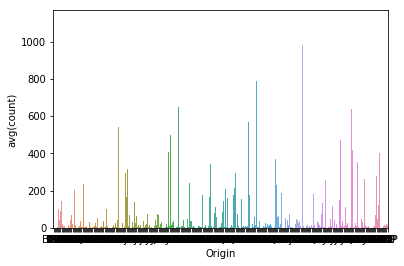

In [33]:
avg_count_per_day = count_per_day.groupBy("Origin").agg(F.mean('count'))
sns.barplot(x="Origin", y="avg(count)", data=avg_count_per_day.toPandas())

In [39]:
avg_count_per_day.describe().show()





+-------+------+------------------+
|summary|Origin|        avg(count)|
+-------+------+------------------+
|  count|   304|               304|
|   mean|  null| 65.66952893837356|
| stddev|  null|141.43998207473115|
|    min|   ABE|               1.0|
|    max|   YUM|1112.7013698630137|
+-------+------+------------------+

